# 网络爬虫之规则
## 单元1:Requests库入门
### Requests库的7个主要方法
| 方法 | 说明 | 
| :-----| :----: | 
| **requests.request()** | 构造一个请求，支撑以下各方法的**基础方法**，其他六个靠他调用 |
| requests.get() | 获取HTML网页的主要方法，对应HTTP的GET |
| requests.head() | 获取HTML网页头信息的方法，对应HTTP的HEAD | 
| requests.post() | 向HTML网页提交POST请求的方法，对应HTTP的POST |
| requests.delete() | 向HTML网页提交删除请求，对应HTTP的DELETE |
| requests.patch() | 向HTML网页提交局部修改请求，对应HTTP的PATCH |
| requests.put() | 向HTML网页提交PUT请求的方法，对应HTTP的PUT |


In [19]:
import requests
r = requests.get('https://www.baidu.com/')
r.status_code   #返回200就是成功

200

In [20]:
requests.head('https://www.baidu.com/')

<Response [200]>

In [15]:
r.headers

{'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Sun, 12 Sep 2021 07:42:29 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:23:46 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/', 'Transfer-Encoding': 'chunked'}

In [2]:
r.encoding = 'urf-8'  #改成utf-8编码
r.text

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus=autofocus></span><span class="bg s

### 获得一个网页最简单的方法
####  r = requests.get(url)
- Request 构造一个向服务器请求资源的Request对象
- Response对象 返回一个包含服务器资源的Response对象，用r来表示，包含爬虫返回的全部内容\
requests.get(url,params=None,\**kwargs)  
- url: 获取页面的url链接
- params：url中的额外参数，字典或字节流格式，可选
- \**kwargs：12个控制访问的参数



#### Response对象的属性
| 方法 | 说明 | 
| :-----| :----: | 
| r.status_code| HTTP请求的返回状态，200表示连接成功，404表示失败 |
| r.text | HTTP响应内容的字符串形式，即，url对应的页面内容 |
| r.encoding | 从HTTP header中猜测的响应内容编码方式 | 
| r.apparent_encoding | 从内容中分析出的响应内容编码方式（备选方式） |
| r.content | HTTP响应内容的二进制形式 |

In [4]:
r.encoding

'urf-8'

In [6]:
r.apparent_encoding

'utf-8'

In [7]:
r.headers

{'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Sun, 12 Sep 2021 07:21:51 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:23:46 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/', 'Transfer-Encoding': 'chunked'}

### 爬取网页的通用代码框架
使用户访问网页更有效，避免错误，所以了解异常情况
#### Requests库的异常
| 异常 | 说明 | 
| :-----| :----: | 
| requests.ConnectionError | 网络连接错误异常，如DNS查询失败、拒绝连接等 |
| requests.HTTPError | HTTP错误异常 |
| requests.URLRequired | URL缺失异常 | 
| requests.TooManyRedirects | 超过最大重定向次数，产生 |
| requests.ConnectTimeout | **连接远程服务器**超时异常 |
| requests.Timeout | 请求URL超时，产生超时异常，整个过程的超时异常 |

In [26]:

import requests

def getHTMLText(url):
    try:
        r= requests.get(url,timeout=30)
        r.raise_for_status()  #如果状态不是200，引发HTTPError异常
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return "产生异常"
    
if __name__ == "__main__":
    url = "https://www.baidu.com/"
    print(getHTMLText(url))
    url_error = "www.baidu.com/"
    print(getHTMLText(url_error))

<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus=autofocus></span><span class="bg s_btn

### HTTP协议及Requests库方法
#### HTTP协议
HTTP，hypertext transfer protocol，超文本传输协议。  
HTTP是一个基于“请求与响应”模式的（用户发出请求服务器做相关响应）、无状态（第一次请求与第二次请求无相关关联）的应用层协议（该协议工作在TCP协议之上）。  
HTTP协议采用URL作为定位网络资源的标识。   

URL格式： http:\//host[:port][path]
- host:合法的Internet主机域名或IP地址
- port:端口号，缺省端口为80，可以省略
- path:请求资源的路径  
如：http:\//www.bit.edu.cn  
http:\//220.181.11.188/duty  IP主机上duty下的内容  

#### HTTP URL的理解:
URL是通过HTTP协议`存取资源的Internet路径`，一个URL对应一个数据存取资源，类似文件夹路径。  
HTTP协议通过URL对资源做定位，通过六个常用方法对资源进行管理
#### HTTP协议对资源的操作(与Requests库功能一致)
| 操作 | 说明 | 
| :-----| :----: | 
| GET | 请求获取URL位置的资源 |
| HEAD | 请求获取URL位置资源的响应消息报告，即获得该资源的头部信息 |
| POST | 请求向URL位置的资源后附加新的数据 | 
| PUT | 请求向URL位置存储一个资源，**覆盖原URL位置的资源**|
| PATCH | 请求局部更新URL位置的资源，即改变该处资源的部分内容 |
| DELETE | 请求删除URL位置存储的资源 |

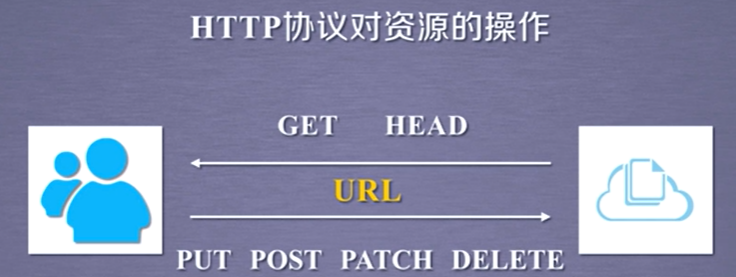

#### 理解PATCH与PUT的区别
假设URL位置有一组数据UserInfo，包括UserID、UserName等20个字段。\
需求：用户修改了UserName，其他不变。
- 采用PATCH，仅向URL提交UserName的局部更新请求。
- 采用PUT，必须将所有20个字段一并提交到URL，未提交字段被删除。\
PACTH的好处是：**节省网络带宽**

### Requests库主要方法解析
#### requests.request(method,url,\**kwargs)
- method:请求方式，对应get/put/post等7种
- url:拟获取页面的url链接
- \**kwargs:控制访问参数，共13个
 
params：字典或字节序列，作为参数增加到url中  
data：字典、字节序列或文件对象，作为Request的内容  
json:JSON格式的数据，作为Request的内容  
headers：字典、HTTP定制头  
cookies：字典或CookieJar，Request中的cookie  
auth：元组，支持HTTP认证功能  
files：字典类型，传输文件  
timeout: 设定超时时间，秒为单位  
proxies：字典类型，设定访问代理服务器，可以增加登录认证  
allow_redirects：True/False，默认为True，重定向开关  
stream：True/False，默认为True，获取内容立即下载开关  
verify：True/False，默认为True，认证SSL证书开关  
cert：本地SSL证书路径